In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("SOCR-HeightWeight.csv")

In [73]:
df.head(10)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


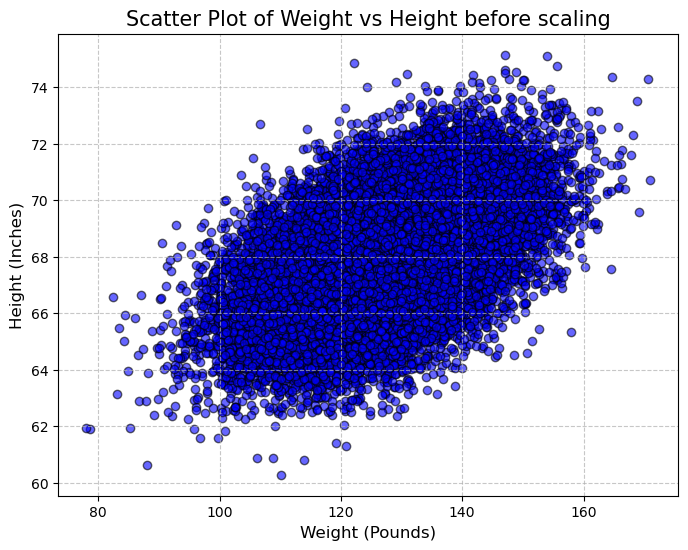

In [79]:
# Plot a scatter plot 
# Scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(x=df["Weight(Pounds)"], y=df["Height(Inches)"], color='blue', alpha=0.6, edgecolor='k')

# Adding labels and title
plt.xlabel("Weight (Pounds)", fontsize=12)
plt.ylabel("Height (Inches)", fontsize=12)
plt.title("Scatter Plot of Weight vs Height before scaling", fontsize=15)

# Adding a grid for better visualization
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


## 5:40

In [7]:
# Split the data into trai and test 
from sklearn.model_selection import train_test_split

In [8]:
# Features and target
X = df[["Weight(Pounds)"]]  # Feature
y = df["Height(Inches)"]    # Target


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7:35

In [11]:
# Scalling should be done after training and test split 
# Standardization here we learn mue and sigma values from train data and find the Z score which is the standardized value of the data 
## fit_trasform >> on train data ----> fir transform means learning the parameters and then applying them 
## transform >> on test data --->> transform means applying the Learned parameters directly 

# Scaling should be done after splitting the data into training and testing sets.
# Standardization: We compute the mean (μ) and standard deviation (σ) from the training data.
# - fit_transform: Used on training data. It learns the parameters (mean and standard deviation) and applies the transformation.
# - transform: Used on testing data. It applies the learned parameters (mean and standard deviation from the training data) to standardize the test data.


## Why is Scaling Necessary?
Scaling ensures that all features contribute equally to the model training process, especially when they have different ranges or units. Without scaling, features with larger ranges can dominate the training process, leading to biased models.

## When is Scaling Necessary?
Scaling is required in the following scenarios:

- Algorithms sensitive to feature magnitudes:
Distance-based models (e.g., K-Nearest Neighbors, K-Means, SVM).
Gradient-based models (e.g., Logistic Regression, Neural Networks).
- Features with different scales:
For example, height in inches and weight in pounds have vastly different ranges.


## Example: Imagine predicting a student’s performance using:

- Study Hours: Range 1 to 10.
- Age: Range 10 to 60.
If scaling is not applied, the model might give more importance to age due to its larger range, even though study hours may be more important for performance.

- Solution: Standardize both features so they have similar ranges (mean = 0, standard deviation = 1), ensuring fair contribution from both features.

# 11:00

In [13]:
# Always perform scaling after train test split 
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_train

array([[-1.4101645 ],
       [-0.00612483],
       [ 1.1306089 ],
       ...,
       [-0.52416228],
       [ 0.7366219 ],
       [-0.36927544]])

In [17]:
# y_train = scaler.fit_transform([y_train]) # Traget variable should nevr be scaled 

In [38]:
y_train

23311    67.94897
23623    66.55460
1020     70.05212
12645    68.48066
1533     66.11208
           ...   
21575    67.48875
5390     66.92527
860      68.39347
15795    69.29711
23654    67.12804
Name: Height(Inches), Length: 20000, dtype: float64

# 18.00

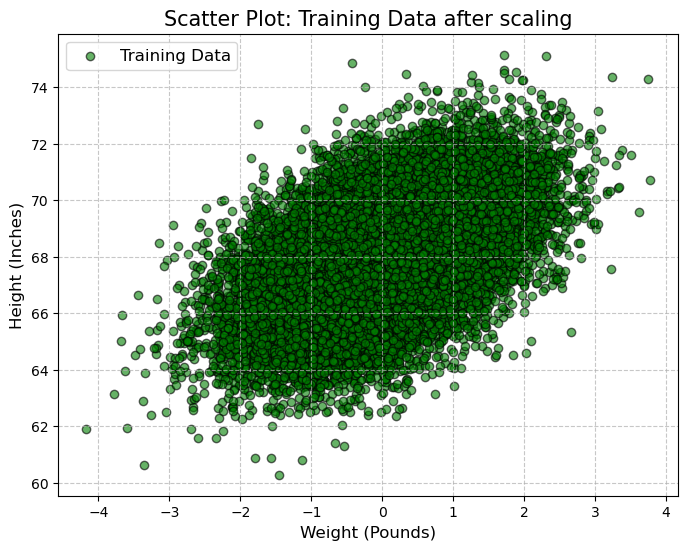

In [85]:
# Scatter plot for training data
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(X_train, y_train, color='green', alpha=0.6, edgecolor='k', label='Training Data')

# Adding labels and title
plt.xlabel("Weight (Pounds)", fontsize=12)
plt.ylabel("Height (Inches)", fontsize=12)
plt.title("Scatter Plot: Training Data after scaling", fontsize=15)

# Adding a legend for clarity
plt.legend(fontsize=12)

# Adding a grid
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


- The scatter plot looks similar before and after scaling because scaling does not change the relationship or distribution of data points; it only adjusts their range.

# 19:34

In [43]:
# Model training 
from sklearn.linear_model import LinearRegression

In [47]:
L_reg = LinearRegression()

In [49]:
Lr_model = L_reg.fit(X_train,y_train)

# 30:20


In [54]:
#detrmine the Coefficiet and intercept values
print(Lr_model.coef_)
print(Lr_model.intercept_)

[0.95022131]
67.99034523350001


# 30.29

In [61]:
y_pred = Lr_model.predict(X_train)


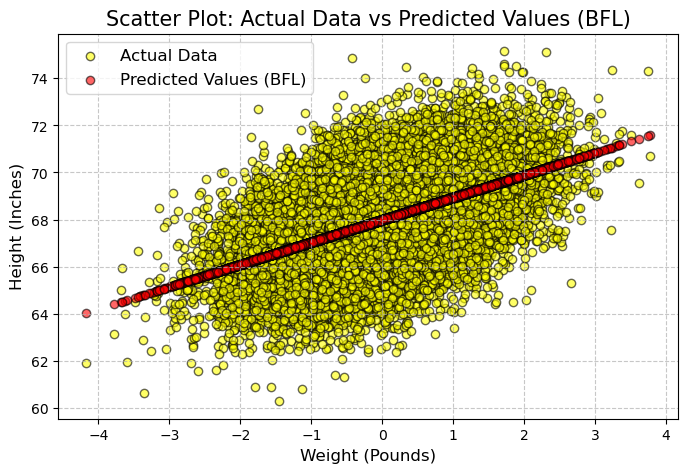

In [87]:
# Plotting the scatter plot
plt.figure(figsize=(8, ))  # Set the figure size
plt.scatter(X_train, y_train, color='yellow', label='Actual Data', alpha=0.6, edgecolor='k')
plt.scatter(X_train, y_pred, color='red', label='Predicted Values (BFL)', alpha=0.6, edgecolor='k')

# Adding labels and title
plt.xlabel("Weight (Pounds)", fontsize=12)
plt.ylabel("Height (Inches)", fontsize=12)
plt.title("Scatter Plot: Actual Data vs Predicted Values (BFL)", fontsize=15)

# Adding a legend for clarity
plt.legend(fontsize=12)

# Adding a grid
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()
